In [1]:
!pip install pygame

In [2]:
!pip install midiutil

In [3]:
!pip install pretty_midi

In [4]:
import sonify

pygame 2.0.1 (SDL 2.0.14, Python 3.7.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
#!wget https://zenodo.org/record/2539456/files/plasticc_train_metadata.csv.gz
#!wget https://zenodo.org/record/2539456/files/plasticc_train_lightcurves.csv.gz

In [7]:
#!mkdir data

In [8]:
#!mv plasticc* data

In [9]:
ls data

plasticc_train_lightcurves.csv.gz  plasticc_train_metadata.csv.gz


In [10]:
data = pd.read_csv("data/plasticc_train_lightcurves.csv.gz") #43018203

In [11]:
objData = data["object_id"].isin([43018203])
obj = data[objData]
time = obj["mjd"]
flux = obj["flux"]


,object_id,mjd,passband,flux,flux_err,detected_bool
931466,43018203,59716.3981,5,9.031878,40.635723,0
931467,43018203,59722.3836,4,16.759033,9.524618,0
931468,43018203,59724.4273,4,-0.819979,7.313416,0
931469,43018203,59729.2829,3,0.943308,4.089046,0
931470,43018203,59749.2689,4,-15.890773,6.238988,0
931471,43018203,59753.2140,1,0.042423,2.469140,0
931472,43018203,59754.1481,3,-4.008509,5.493313,0
931473,43018203,59776.3377,4,16.887375,22.398090,0
931474,43018203,59777.3194,5,-57.664654,49.258453,0
931475,43018203,59778.0990,2,-3.216466,3.057677,0


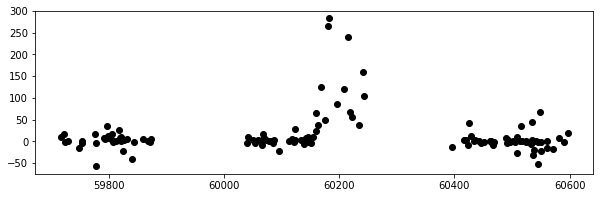

In [158]:
plt.figure(figsize=(10, 3))
plt.plot(time, flux, 'o', color = "black")


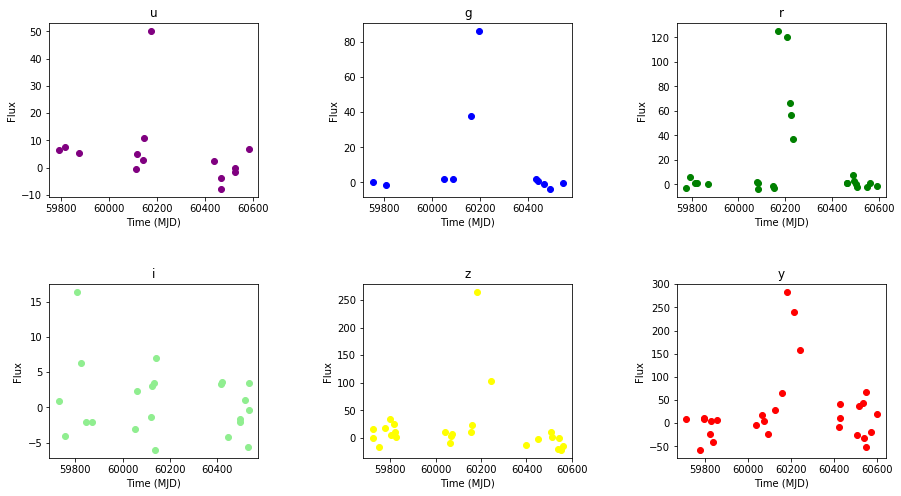

In [13]:
f, ax = plt.subplots(2,3, figsize=(15,8))
f.subplots_adjust(wspace=0.5)
f.subplots_adjust(hspace=0.5)
ax = ax.flatten()
ugrizyC = ["purple", "blue", "green", "lightgreen", "yellow", "red"]
ugrizy = ["u","g","r","i","z","y"]
for i in range(6):
    objPfilt = obj["passband"].isin([i])
    objP = obj[objPfilt]
    timeP = objP["mjd"]
    fluxP = objP["flux"]
    ax[i].set_xlabel("Time (MJD)")
    ax[i].set_ylabel("Flux")
    ax[i].set_title(ugrizy[i])
    ax[i].scatter(timeP, fluxP, color = ugrizyC[i])
   


Text(0, 0.5, 'Flux')

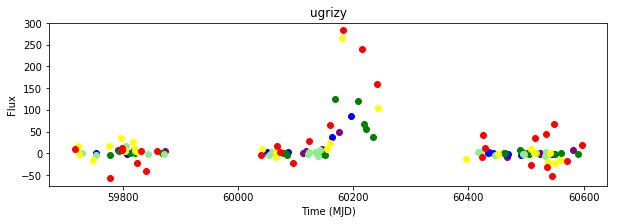

In [14]:
plt.figure(figsize=(10, 3))
ugrizyC = ["purple", "blue", "green", "lightgreen", "yellow", "red"]
for i in range(6):
    objPfilt = obj["passband"].isin([i])
    objP = obj[objPfilt]
    timeP = objP["mjd"]
    fluxP = objP["flux"]
    plt.plot(timeP,fluxP, 'o', color = ugrizyC[i])
plt.title("ugrizy")
plt.xlabel("Time (MJD)")
plt.ylabel("Flux")

In [15]:
x_points = time
y_points = flux
low_note=20
high_note=100
normalized_x = sonify.core.scale_list_to_range(x_points, new_min=0, new_max=30)
normalized_y = sonify.core.scale_list_to_range(y_points, new_min=low_note, new_max=high_note)
        
normed_data = list(zip(normalized_x, normalized_y))


# PLAY THIS FIRST

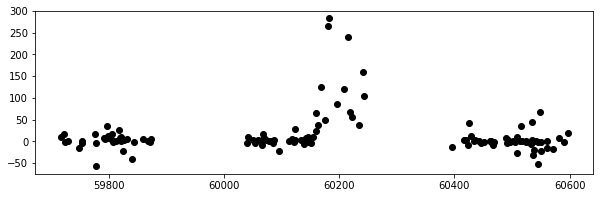

In [197]:
plt.figure(figsize=(10, 3))
plt.plot(time, flux, 'o', color = "black")

In [199]:
sonify.play_midi_from_data(normed_data)

Done playing!


In [30]:
############################################### now for multitrack

In [117]:
ugrizyC = ["purple", "blue", "green", "lightgreen", "yellow", "red"]
def multiPlotObject(data, x0=None, x1=None, y0=None, y1=None):
    plt.figure(figsize=(10, 3))
    plt.xlabel("Time (MJD)")
    plt.ylabel("Flux")
    
    #objData = data["object_id"].isin([objectID])
    obj = data#[objData]
    
    for i in range(6):
        objPfilt = obj["passband"].isin([i])
        objP = obj[objPfilt]
        timeP = objP["mjd"]
        #print(timeP)
        fluxP = objP["flux"]
        plt.plot(timeP,fluxP, 'o', color = ugrizyC[i])

    if not (x0 is None) and not (x1 is None):
        plt.xlim(x0,x1)
    if not (y0 is None) and not (y1 is None):
        plt.ylim(y0,y1)
        
def multiPlotBand(timeP, fluxP, fluxerrP=None, 
                  i=0, x0=None, x1=None, y0=None, y1=None):
    plt.xlabel("Time (MJD)")
    plt.ylabel("Flux")

    if fluxerrP is None:
        plt.plot(timeP, fluxP, 'o', color = ugrizyC[i], label="ugrizy"[i])
    else:
        plt.errorbar(timeP, fluxP, yerr=fluxerrP, fmt='o', color = ugrizyC[i], label="ugrizy"[i])
  
    if not (x0 is None) and not (x1 is None):
        plt.xlim(x0,x1)
    if not (y0 is None) and not (y1 is None):
        plt.ylim(y0,y1)
    plt.legend()

In [204]:

def multiSonification(data, band=None):
    multiData = []

    FEObj = pd.DataFrame()
    
    number_of_octaves = []
    octave_start = []
    volume = []
    for i in range(6):
        if not (band is None) and not i==band:
            continue
        print(i)
        objPfilt = data["passband"].isin([i])
        objP = data[objPfilt]
        timeP = objP["mjd"]
        #print(timeP)
        fluxP = objP["flux"]
        errP = objP["flux_err"] 
        scaled_x = sonify.scale_list_to_range(timeP, new_min=0, new_max=10)
        #print(scaled_x)
        scaled_y = sonify.scale_list_to_range(fluxP, new_min=0, new_max=fluxP.max()/100)
        
        scaled_errP = sonify.scale_list_to_range(errP, new_min=0, new_max=254)
        scaled_errP = 255 - np.array(scaled_errP)
        quantized_x = sonify.quantize_x_value(scaled_x, 0.01)
        qyantized_y = sonify.quantize_x_value(scaled_y, 0.01)
        #print(scaled_y)
        multiData.append(list(zip(quantized_x, scaled_y)))
        #print(multiData)
        volume.append(np.array(scaled_errP).astype(int))
        number_of_octaves.append(int(fluxP.max()/10)+1)
        octave_start.append(3-i)
        multiPlotBand(quantized_x, fluxP, fluxerrP=errP, i=i)
    plt.show()
    instruments_to_add = ['piccolo',
                          'violin',
                          'viola',
                          'cello',
                          'slap bass 1','tuba']
    
    multiDataWIntsruments = []
    for index, track in enumerate(multiData):
        multiDataWIntsruments.append([instruments_to_add[index]] + track)
    print(octave_start)
    print(number_of_octaves)
    print("volume", volume)
    print(quantized_x)
    print(scaled_y)
    #sonify.play_midi_from_data([multiDataWIntsruments[0]], track_type='multiple', key='c_major')
    #track_type='multiple', key='c_major')
    #FEObj = data
    if not (band is None):
        sonify.play_midi_from_data(multiDataWIntsruments[0:1], track_type='multiple', 
                               key='c_minor', octave_start = octave_start,
                               #number_of_octaves=number_of_octaves, 
                               volume=volume)
    else:
        sonify.play_midi_from_data(multiDataWIntsruments, track_type='multiple', 
                               key='c_minor', octave_start = octave_start,
                               #number_of_octaves=number_of_octaves, 
                               volume=volume)
    return(data)


def multimonotoneSonification(data, nbands):
    multiData = []

    FEObj = pd.DataFrame()
    
    number_of_octaves = []
    octave_start = []
    volume = []
    for i in range(6):
        print(i)
        objPfilt = data["passband"].isin([i])
        objP = data[objPfilt]
        timeP = objP["mjd"]
        #print(timeP)
        fluxP = objP["flux"]
        errP = objP["flux_err"] 
        refluxP = np.zeros_like(objP["flux"]) + i * 10 + 1
        scaled_x = sonify.scale_list_to_range(timeP, new_min=0, new_max=10)
        #print(scaled_x)
        quantized_x = sonify.quantize_x_value(scaled_x, 0.01)
        #print(scaled_y)
        multiData.append(list(zip(quantized_x, refluxP)))
        #print(multiData)
        number_of_octaves.append(int(fluxP.max()/10)+1)
        octave_start.append(3-i)
        
        #print(refluxP)
        
        volume.append(sonify.quantize_x_value(
            sonify.scale_list_to_range(fluxP, new_min=1, new_max=255), 1))
        print(volume)
        #volume[-1] = sonify.scale_list_to_range(volume[-1], new_min=0, new_max=np.abs(volume[-1]).max())
        number_of_octaves.append(int(fluxP.max()/10)+1)
        octave_start.append(3-i)
        multiPlotBand(quantized_x, fluxP, fluxerrP=errP, i=i)
    plt.show()
    instruments_to_add = ['piccolo',
                          'viola',
                          "trumpet",
                          'cello',
                          'tuba', 
                          'steel drums']
    #instruments_to_add = [inst] * 6
    
    multiDataWIntsruments = []
    for index, track in enumerate(multiData):
        multiDataWIntsruments.append([instruments_to_add[index]] + track)
    #print(octave_start)
    #print(number_of_octaves)
    #print(volume)
    #sonify.play_midi_from_data([multiDataWIntsruments[0]], track_type='multiple', key='c_major')
    #track_type='multiple', key='c_major')
    #FEObj = data
    sonify.play_midi_from_data(multiDataWIntsruments[:nbands], track_type='multiple', 
                               key='c_minor', octave_start = octave_start,
                               number_of_octaves=number_of_octaves,
                               volume=volume)
    return(data)



# play this next

0
1
2
3
4
5


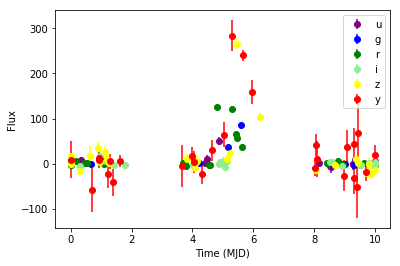

[3, 2, 1, 0, -1, -2]
[6, 9, 13, 2, 27, 29]
volume [array([196, 205, 203,  86, 174, 255, 165, 130, 122, 245,  70,  95,   1,
       175]), array([113, 255, 238, 182,  75, 174, 224,  99,  99,   1, 123]), array([186, 159, 226, 234, 208, 226, 198, 166, 153,  51, 232,  63,   1,
       188, 215, 166, 184,  76, 206, 255,  82, 172, 231, 247]), array([212, 170,  77, 162, 195, 218, 195, 157, 207, 183,   1, 135, 210,
       255, 199, 161, 162, 193, 183, 178, 198, 149]), array([203, 238, 255,   1, 143, 224, 128, 208, 216, 185, 183, 198, 206,
       221, 198, 160, 222, 129, 196, 227, 215, 166, 119, 166, 183]), array([126,  86, 255, 210, 165, 232, 176, 249,  98, 218, 200, 210, 205,
       186, 156, 252, 191, 227, 198, 129, 154, 138, 152, 153,   1,  19,
       226, 212])]
[0.0, 0.69, 0.93, 0.94, 1.22, 1.3, 1.4, 1.62, 3.67, 4.0, 4.05, 4.3, 4.63, 5.03, 5.3, 5.66, 5.97, 8.03, 8.05, 8.08, 8.99, 9.07, 9.3, 9.31, 9.42, 9.44, 9.71, 10.0]
[0.5542883033428995, 0.0, 0.5469369695831031, 0.578156367664106, 0.2911

,object_id,mjd,passband,flux,flux_err,detected_bool
931466,43018203,59716.3981,5,9.031878,40.635723,0
931467,43018203,59722.3836,4,16.759033,9.524618,0
931468,43018203,59724.4273,4,-0.819979,7.313416,0
931469,43018203,59729.2829,3,0.943308,4.089046,0
931470,43018203,59749.2689,4,-15.890773,6.238988,0
931471,43018203,59753.2140,1,0.042423,2.469140,0
931472,43018203,59754.1481,3,-4.008509,5.493313,0
931473,43018203,59776.3377,4,16.887375,22.398090,0
931474,43018203,59777.3194,5,-57.664654,49.258453,0
931475,43018203,59778.0990,2,-3.216466,3.057677,0


In [207]:
multiSonification(obj)

u
0


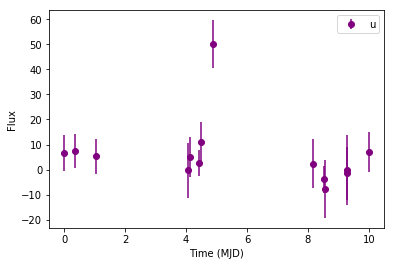

[3]
[6]
volume [array([196, 205, 203,  86, 174, 255, 165, 130, 122, 245,  70,  95,   1,
       175])]
[0.0, 0.35, 1.05, 4.07, 4.14, 4.41, 4.48, 4.87, 8.16, 8.52, 8.55, 9.27, 9.28, 10.0]
[0.12489595303827983, 0.1322222253862713, 0.11379480093588412, 0.0647207322221011, 0.11116896962447206, 0.09035019446582614, 0.16148091725782582, 0.50136681, 0.0881629755348695, 0.033226104023158065, 0.0, 0.05407394688209153, 0.06607070962848642, 0.1277040158048596]
Done playing!


,object_id,mjd,passband,flux,flux_err,detected_bool
931466,43018203,59716.3981,5,9.031878,40.635723,0
931467,43018203,59722.3836,4,16.759033,9.524618,0
931468,43018203,59724.4273,4,-0.819979,7.313416,0
931469,43018203,59729.2829,3,0.943308,4.089046,0
931470,43018203,59749.2689,4,-15.890773,6.238988,0
931471,43018203,59753.2140,1,0.042423,2.469140,0
931472,43018203,59754.1481,3,-4.008509,5.493313,0
931473,43018203,59776.3377,4,16.887375,22.398090,0
931474,43018203,59777.3194,5,-57.664654,49.258453,0
931475,43018203,59778.0990,2,-3.216466,3.057677,0


In [206]:
i=0
print("ugrizy"[i])
multiSonification(obj, i)

g
1


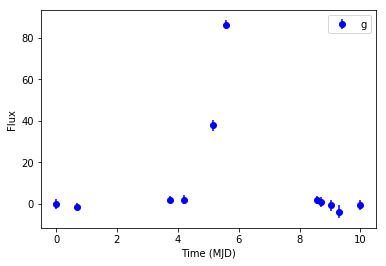

[2]
[9]
volume [array([113, 255, 238, 182,  75, 174, 224,  99,  99,   1, 123])]
[0.0, 0.68, 3.75, 4.21, 5.17, 5.59, 8.59, 8.69, 9.02, 9.31, 10.0]
[0.03596583761687734, 0.020829650271088775, 0.054769030823162604, 0.055086960021289995, 0.3984745982844144, 0.8631291999999999, 0.054088386779437954, 0.044326975707139865, 0.0286425261276494, 0.0, 0.02997884700764602]
Done playing!


,object_id,mjd,passband,flux,flux_err,detected_bool
931466,43018203,59716.3981,5,9.031878,40.635723,0
931467,43018203,59722.3836,4,16.759033,9.524618,0
931468,43018203,59724.4273,4,-0.819979,7.313416,0
931469,43018203,59729.2829,3,0.943308,4.089046,0
931470,43018203,59749.2689,4,-15.890773,6.238988,0
931471,43018203,59753.2140,1,0.042423,2.469140,0
931472,43018203,59754.1481,3,-4.008509,5.493313,0
931473,43018203,59776.3377,4,16.887375,22.398090,0
931474,43018203,59777.3194,5,-57.664654,49.258453,0
931475,43018203,59778.0990,2,-3.216466,3.057677,0


In [208]:
i=1
print("ugrizy"[i])
multiSonification(obj, i)

# play this next

r
2


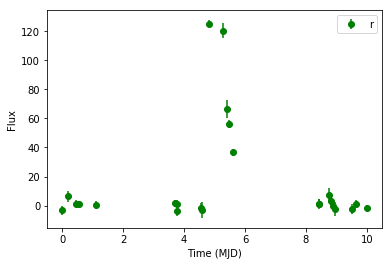

[1]
[13]
volume [array([186, 159, 226, 234, 208, 226, 198, 166, 153,  51, 232,  63,   1,
       188, 215, 166, 184,  76, 206, 255,  82, 172, 231, 247])]
[0.0, 0.19, 0.43, 0.53, 1.11, 3.7, 3.75, 3.78, 4.55, 4.59, 4.81, 5.29, 5.42, 5.48, 5.62, 8.42, 8.44, 8.77, 8.81, 8.9, 8.95, 9.51, 9.64, 10.0]
[0.005785447329537925, 0.09771984207480953, 0.04822701293810117, 0.04461642052088592, 0.038649658452337796, 0.0517744271210416, 0.04547250015250653, 0.0, 0.021723044914367464, 0.006210255447650294, 1.2533988999999999, 1.2059700581644996, 0.6819339238609621, 0.582776461550469, 0.39323095728596624, 0.04948692861959023, 0.0490757169233241, 0.10722568190490915, 0.06462236642988534, 0.03530503572614185, 0.0121192157399556, 0.01567080298598945, 0.05000517453180367, 0.02008024584165808]
Done playing!


,object_id,mjd,passband,flux,flux_err,detected_bool
931466,43018203,59716.3981,5,9.031878,40.635723,0
931467,43018203,59722.3836,4,16.759033,9.524618,0
931468,43018203,59724.4273,4,-0.819979,7.313416,0
931469,43018203,59729.2829,3,0.943308,4.089046,0
931470,43018203,59749.2689,4,-15.890773,6.238988,0
931471,43018203,59753.2140,1,0.042423,2.469140,0
931472,43018203,59754.1481,3,-4.008509,5.493313,0
931473,43018203,59776.3377,4,16.887375,22.398090,0
931474,43018203,59777.3194,5,-57.664654,49.258453,0
931475,43018203,59778.0990,2,-3.216466,3.057677,0


In [209]:
i=2
print("ugrizy"[i])
multiSonification(obj, i)

i
3


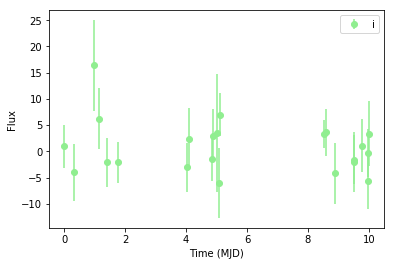

[3]
[2]
volume [array([210, 168,  76, 160, 193, 216, 194, 155, 205, 181,   0, 134, 208,
       253, 197, 159, 161, 191, 182, 176, 196, 147])]
[0.0, 0.31, 0.96, 1.15, 1.41, 1.77, 4.02, 4.1, 4.86, 4.89, 5.02, 5.07, 5.12, 8.53, 8.58, 8.9, 9.5, 9.53, 9.79, 9.97, 9.99, 10.0]
[0.05090471342207709, 0.014703177313569425, 0.16364618, 0.08964247578897742, 0.02849668431088008, 0.028847907750220617, 0.02176063224080524, 0.061340038320095554, 0.03372278703008453, 0.06605331329275697, 0.06919868653530374, 0.0, 0.09506010574817696, 0.06863319939836128, 0.07041370528399529, 0.013243686814918512, 0.029007677057146804, 0.032391432188178165, 0.05167979268221289, 0.0024065992070012292, 0.04116633771266884, 0.06873777248183671]
Done playing!


,object_id,mjd,passband,flux,flux_err,detected_bool
931466,43018203,59716.3981,5,9.031878,40.635723,0
931467,43018203,59722.3836,4,16.759033,9.524618,0
931468,43018203,59724.4273,4,-0.819979,7.313416,0
931469,43018203,59729.2829,3,0.943308,4.089046,0
931470,43018203,59749.2689,4,-15.890773,6.238988,0
931471,43018203,59753.2140,1,0.042423,2.469140,0
931472,43018203,59754.1481,3,-4.008509,5.493313,0
931473,43018203,59776.3377,4,16.887375,22.398090,0
931474,43018203,59777.3194,5,-57.664654,49.258453,0
931475,43018203,59778.0990,2,-3.216466,3.057677,0


In [137]:
i=3
print("ugrizy"[i])
multiSonification(obj, i)

z
4


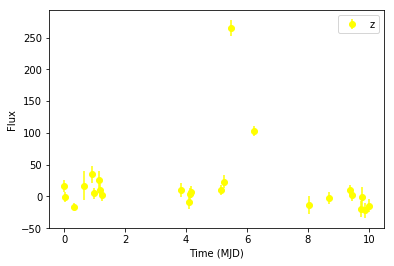

[2]
[27]
volume [array([201, 236, 253,   0, 142, 222, 127, 206, 214, 183, 181, 196, 205,
       220, 196, 159, 220, 127, 194, 225, 213, 164, 117, 164, 181])]
[0.0, 0.02, 0.32, 0.64, 0.89, 0.98, 1.14, 1.18, 1.25, 3.82, 4.09, 4.11, 4.15, 5.15, 5.23, 5.48, 6.22, 8.05, 8.7, 9.39, 9.45, 9.74, 9.79, 9.88, 10.0]
[0.35742465432147663, 0.19506883160459765, 0.05587834929156415, 0.3586099923256335, 0.5260122801655691, 0.24572736948739965, 0.44166482585467004, 0.29871370166907263, 0.2213655896762635, 0.29558691112518737, 0.11944668301847398, 0.23868054604326086, 0.26981283334266504, 0.2981524158349215, 0.41909109233862646, 2.65160553, 1.1563880107362294, 0.08007087426590348, 0.1795593402068279, 0.2917364051490529, 0.21825023302345947, 0.02003152143418258, 0.20041102628534466, 0.0, 0.07034400401413941]
Done playing!


,object_id,mjd,passband,flux,flux_err,detected_bool
931466,43018203,59716.3981,5,9.031878,40.635723,0
931467,43018203,59722.3836,4,16.759033,9.524618,0
931468,43018203,59724.4273,4,-0.819979,7.313416,0
931469,43018203,59729.2829,3,0.943308,4.089046,0
931470,43018203,59749.2689,4,-15.890773,6.238988,0
931471,43018203,59753.2140,1,0.042423,2.469140,0
931472,43018203,59754.1481,3,-4.008509,5.493313,0
931473,43018203,59776.3377,4,16.887375,22.398090,0
931474,43018203,59777.3194,5,-57.664654,49.258453,0
931475,43018203,59778.0990,2,-3.216466,3.057677,0


In [138]:
i=4
print("ugrizy"[i])
multiSonification(obj, i)

# play this next

y
5


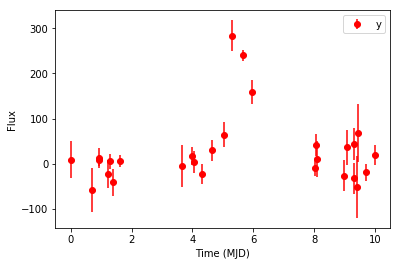

[1]
[29]
volume [array([126,  86, 255, 210, 165, 232, 176, 249,  98, 218, 200, 210, 205,
       186, 156, 252, 191, 227, 198, 129, 154, 138, 152, 153,   1,  19,
       226, 212])]
[0.0, 0.69, 0.93, 0.94, 1.22, 1.3, 1.4, 1.62, 3.67, 4.0, 4.05, 4.3, 4.63, 5.03, 5.3, 5.66, 5.97, 8.03, 8.05, 8.08, 8.99, 9.07, 9.3, 9.31, 9.42, 9.44, 9.71, 10.0]
[0.5542883033428995, 0.0, 0.5469369695831031, 0.578156367664106, 0.2911033693960749, 0.5246076630056088, 0.140708000165625, 0.5308452431858217, 0.4421475888438568, 0.6254968867401323, 0.5102071190953775, 0.2854767015370414, 0.7240161928470393, 1.0166520454826438, 2.83667816, 2.472163249564554, 1.7998774848592, 0.4099278436522517, 0.8280050299585536, 0.5752400030516642, 0.2629605726363243, 0.7803615395918062, 0.8465848091847243, 0.2111517505900588, 0.050529172238204544, 1.0391295716390827, 0.3231781943175572, 0.6351304779022179]
Done playing!


,object_id,mjd,passband,flux,flux_err,detected_bool
931466,43018203,59716.3981,5,9.031878,40.635723,0
931467,43018203,59722.3836,4,16.759033,9.524618,0
931468,43018203,59724.4273,4,-0.819979,7.313416,0
931469,43018203,59729.2829,3,0.943308,4.089046,0
931470,43018203,59749.2689,4,-15.890773,6.238988,0
931471,43018203,59753.2140,1,0.042423,2.469140,0
931472,43018203,59754.1481,3,-4.008509,5.493313,0
931473,43018203,59776.3377,4,16.887375,22.398090,0
931474,43018203,59777.3194,5,-57.664654,49.258453,0
931475,43018203,59778.0990,2,-3.216466,3.057677,0


In [202]:
i=5
print("ugrizy"[i])
multiSonification(obj, i)

# play this next

0
[[64, 68, 59, 34, 57, 47, 83, 255, 46, 18, 1, 28, 34, 66]]
1
[[64, 68, 59, 34, 57, 47, 83, 255, 46, 18, 1, 28, 34, 66], [12, 7, 17, 17, 118, 255, 17, 14, 9, 1, 10]]
2
[[64, 68, 59, 34, 57, 47, 83, 255, 46, 18, 1, 28, 34, 66], [12, 7, 17, 17, 118, 255, 17, 14, 9, 1, 10], [2, 21, 11, 10, 9, 11, 10, 1, 5, 2, 255, 245, 139, 119, 81, 11, 11, 23, 14, 8, 3, 4, 11, 5]]
3
[[64, 68, 59, 34, 57, 47, 83, 255, 46, 18, 1, 28, 34, 66], [12, 7, 17, 17, 118, 255, 17, 14, 9, 1, 10], [2, 21, 11, 10, 9, 11, 10, 1, 5, 2, 255, 245, 139, 119, 81, 11, 11, 23, 14, 8, 3, 4, 11, 5], [80, 24, 255, 140, 45, 46, 35, 96, 53, 104, 108, 1, 149, 108, 110, 22, 46, 51, 81, 5, 65, 108]]
4
[[64, 68, 59, 34, 57, 47, 83, 255, 46, 18, 1, 28, 34, 66], [12, 7, 17, 17, 118, 255, 17, 14, 9, 1, 10], [2, 21, 11, 10, 9, 11, 10, 1, 5, 2, 255, 245, 139, 119, 81, 11, 11, 23, 14, 8, 3, 4, 11, 5], [80, 24, 255, 140, 45, 46, 35, 96, 53, 104, 108, 1, 149, 108, 110, 22, 46, 51, 81, 5, 65, 108], [35, 20, 6, 35, 51, 25, 43, 30, 22, 29, 12, 

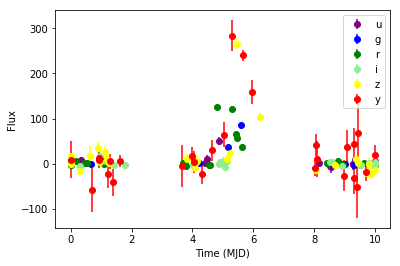

Done playing!


,object_id,mjd,passband,flux,flux_err,detected_bool
931466,43018203,59716.3981,5,9.031878,40.635723,0
931467,43018203,59722.3836,4,16.759033,9.524618,0
931468,43018203,59724.4273,4,-0.819979,7.313416,0
931469,43018203,59729.2829,3,0.943308,4.089046,0
931470,43018203,59749.2689,4,-15.890773,6.238988,0
931471,43018203,59753.2140,1,0.042423,2.469140,0
931472,43018203,59754.1481,3,-4.008509,5.493313,0
931473,43018203,59776.3377,4,16.887375,22.398090,0
931474,43018203,59777.3194,5,-57.664654,49.258453,0
931475,43018203,59778.0990,2,-3.216466,3.057677,0


In [203]:
multimonotoneSonification(obj,  6)

Done playing!
